In [1]:
import numpy as np
import tensorflow_datasets as tfds
from PIL import Image

In [ ]:
import kagglehub

path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

c:\projects\python\clasificator-cat-dogs\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\inder\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1


In [3]:
import tensorflow as ts
from tensorflow.keras import Sequential, models, layers
from pathlib import Path


data = Path(path)
data

WindowsPath('C:/Users/inder/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1')

In [4]:
list(data.glob('**/*.jpg'))[:5]

[WindowsPath('C:/Users/inder/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/0.jpg'),
 WindowsPath('C:/Users/inder/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/1.jpg'),
 WindowsPath('C:/Users/inder/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/10.jpg'),
 WindowsPath('C:/Users/inder/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/100.jpg'),
 WindowsPath('C:/Users/inder/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/1000.jpg')]

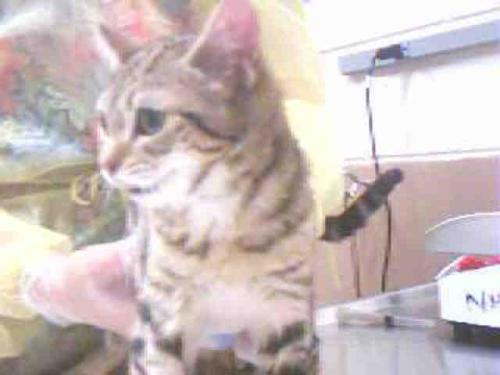

In [5]:
Image.open(str(list(data.glob('PetImages/Cat/*.*'))[12472]))

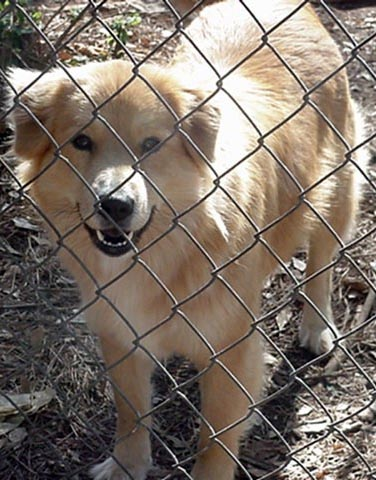

In [6]:
Image.open(str(list(data.glob('PetImages/Dog/*.*'))[12472]))

In [7]:
animals = {
    'dog': list(data.glob('PetImages/Dog/*.*')),
    'cat': list(data.glob('PetImages/Cat/*.*')),
}

In [8]:
label = {
    'dog': 1,
    'cat': 0,
}

In [10]:
import cv2

In [ ]:
X = []
Y = []

for name, images in animals.items():
    for image in images:
        try:
            image_path = str(image).strip()
            img = cv2.imread(image_path)

            if image_path is not None:
                img_resize = cv2.resize(img, (200, 200))
                X.append(img_resize)
                Y.append(label[name])
                print(len(X), len(Y))
            else:
                pass
        except Exception as e:
            print(e)

1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99
100 100
101 101
102 102
103 103
104 104
105 105
106 106
107 107
108 108
109 109
110 110
111 111
112 112
113 113
114 114
115 115
116 116
117 117
118 118
119 119
120 120
121 121
122 122
123 123
124 124
125 125
126 126
127 127
128 128
129 129
130 130
131 131
132 132
133 133
134 134
135 135
136 136
137 137
138 138
139 139
140 140
141 141
142 142
143 143
144 144
145 145
146 146
147 147
148 148
149 149
150 150
151 151
152 152


In [20]:
print(len(X), len(Y))

x_np = np.array(X)
y_np = np.array(Y)

x_np = x_np.astype('float32')
y_np = y_np.astype('float32')

24946 24946


In [21]:
x_np.shape

(24946, 200, 200, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2, random_state=42, stratify=y_np)

In [16]:
from tensorflow.keras.regularizers import l2

In [29]:
model = Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu',kernel_regularizer=l2(0.05)),
    layers.Dropout(0.5),
    layers.Dense(64,activation='relu',kernel_regularizer=l2(0.05)),
    layers.Dropout(0.5),

    layers.Dense(1,activation='sigmoid'),
])

c:\projects\python\clasificator-cat-dogs\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [33]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [34]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 288s 449ms/step - accuracy: 0.5396 - loss: 2.2500
Epoch 2/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 273s 437ms/step - accuracy: 0.5822 - loss: 0.7553
Epoch 3/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 267s 428ms/step - accuracy: 0.5922 - loss: 0.7658
Epoch 4/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 266s 427ms/step - accuracy: 0.6023 - loss: 0.7460
Epoch 5/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 267s 427ms/step - accuracy: 0.6000 - loss: 0.7222
Epoch 6/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 266s 426ms/step - accuracy: 0.6079 - loss: 0.7134
Epoch 7/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 265s 425ms/step - accuracy: 0.6077 - loss: 0.6992
Epoch 8/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 280s 449ms/step - accuracy: 0.6157 - loss: 0.7041
Epoch 9/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 18097s 29s/step - accuracy: 0.6157 - loss: 0.7059
Epoch 10/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 300s 480ms/step - accuracy: 0.6144 - loss: 0.6970
Epoch 11/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 291s 466ms/step - accuracy: 0.6106 - loss: 0.6974
Epoch 12

In [ ]:
model.evaluate(X_test, y_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.5302 - loss: 1.2298


[1.2295701503753662, 0.533266544342041]

In [ ]:
model.save('models/cat_dog_classifier.h5')